# 標籤

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

`legend()` 函數被用來添加圖像的標籤，其主要相關的屬性有：

- legend entry - 一個 legend 包含一個或多個 entry，一個 entry 對應一個 key 和一個 label 
- legend key - marker 的標記
- legend label - key 的說明
- legend handle - 一個 entry 在圖上對應的物件

## 使用 legend

呼叫 `legend()` 會自動獲取當前的 `Axes` 物件，並且得到這些 handles 和 labels，相當於：

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

我們可以在函數中指定 `handles` 的參數：

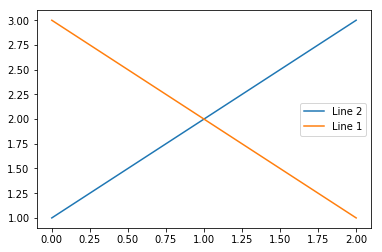

In [2]:
line_up, = plt.plot([1,2,3], label='Line 2')
line_down, = plt.plot([3,2,1], label='Line 1')
plt.legend(handles=[line_up, line_down])
plt.show()

可以將 labels 作為參數輸入 `legend` 函數：

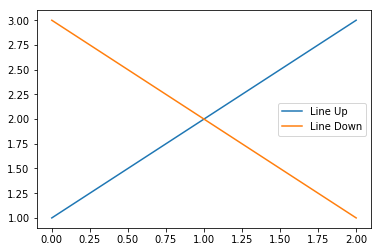

In [3]:
line_up, = plt.plot([1,2,3])
line_down, = plt.plot([3,2,1])
plt.legend([line_up, line_down], ['Line Up', 'Line Down'])
plt.show()

## 產生特殊形狀的 marker key

有時我们可以產生一些特殊形狀的 marker：

塊狀：

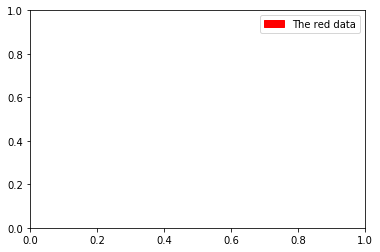

In [4]:
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='The red data')
plt.legend(handles=[red_patch])

plt.show()

點線組合：

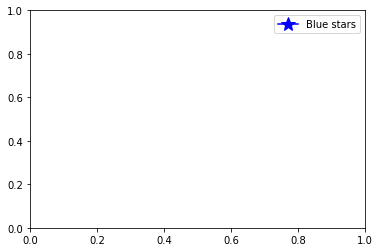

In [5]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          markersize=15, label='Blue stars')
plt.legend(handles=[blue_line])

plt.show()

## 指定 legend 的位置

`bbox_to_anchor` 關鍵字可以指定 `legend` 放置的位置，例如放到圖像的右上角：

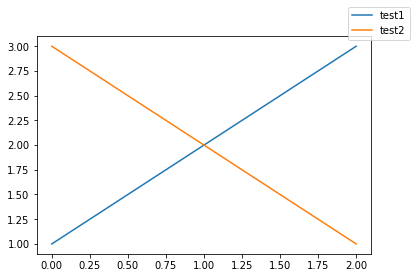

In [6]:
plt.plot([1,2,3], label="test1")
plt.plot([3,2,1], label="test2")
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

plt.show()

更複雜的用法：

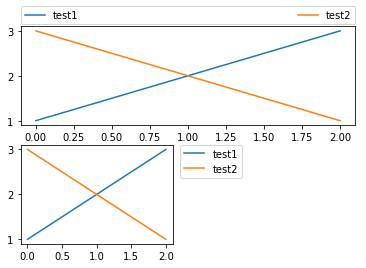

In [7]:
plt.subplot(211)
plt.plot([1,2,3], label="test1")
plt.plot([3,2,1], label="test2")
# Place a legend above this legend, expanding itself to
# fully use the given bounding box.
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(223)
plt.plot([1,2,3], label="test1")
plt.plot([3,2,1], label="test2")
# Place a legend to the right of this smaller figure.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

## 同一個 Axes 中的多個legend

可以這樣添加多個 `legend`於同一個Axes：

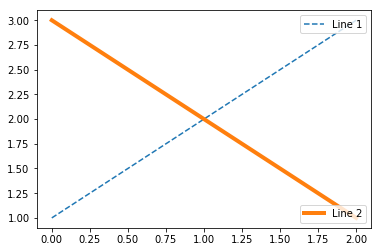

In [8]:
line1, = plt.plot([1,2,3], label="Line 1", linestyle='--')
line2, = plt.plot([3,2,1], label="Line 2", linewidth=4)

# Create a legend for the first line.
first_legend = plt.legend(handles=[line1], loc=1)

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

# Create another legend for the second line.
plt.legend(handles=[line2], loc=4)

plt.show()

其中 `loc` 參數可以取 0-10 或者 字串，表示放置的位置：

loc string | loc code
---|---
`'best'  `|          0
`'upper right' `   | 1
`'upper left'  `    |2
`'lower left'  `    |3
`'lower right' `    |4
`'right'       `   | 5
`'center left' `    |6
`'center right'`   | 7
`'lower center'`  |  8
`'upper center'` |   9
`'center'`          |10

## 更多用法

多個 `handle` 可以通過括弧組合在一個 entry 中：

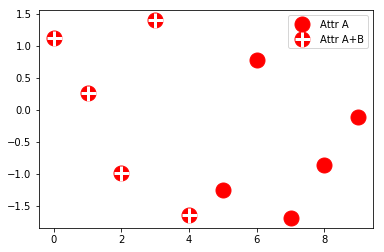

In [9]:
from numpy.random import randn

z = randn(10)

red_dot, = plt.plot(z, "ro", markersize=15)
# Put a white cross over some of the data.
white_cross, = plt.plot(z[:5], "w+", markeredgewidth=3, markersize=15)

plt.legend([red_dot, (red_dot, white_cross)], ["Attr A", "Attr A+B"])

plt.show()

自定義 `handle`：

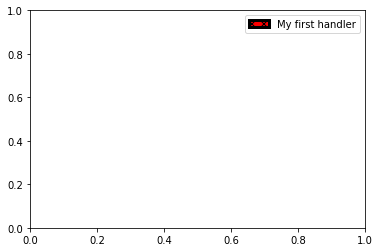

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

class AnyObject(object):
    pass

class AnyObjectHandler(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch = mpatches.Rectangle([x0, y0], width, height, facecolor='red',
                                   edgecolor='black', hatch='xx', lw=3,
                                   transform=handlebox.get_transform())
        handlebox.add_artist(patch)
        return patch

plt.legend([AnyObject()], ['My first handler'],
           handler_map={AnyObject: AnyObjectHandler()})

plt.show()

橢圓：

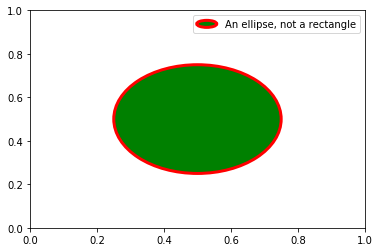

In [11]:
from matplotlib.legend_handler import HandlerPatch
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=width + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]


c = mpatches.Circle((0.5, 0.5), 0.25, facecolor="green",
                    edgecolor="red", linewidth=3)
plt.gca().add_patch(c)

plt.legend([c], ["An ellipse, not a rectangle"],
           handler_map={mpatches.Circle: HandlerEllipse()})

plt.show()